# Quantiles
## Quantile Definition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from scipy.stats import norm, gamma, pareto
import seaborn as sns


rng = np.random.default_rng(112358)
rv_norm = norm(loc=2, scale=2)
rv_gamma = gamma(a=1, scale=2)  # mean = a * scale, var = a * scale**2
rv_pareto = pareto(b=2)  # mean = b/(b-1), variance = inf

name=normal mean=2.0 variance=4.0
name=gamma  mean=2.0 variance=4.0
name=pareto mean=2.0 variance=inf


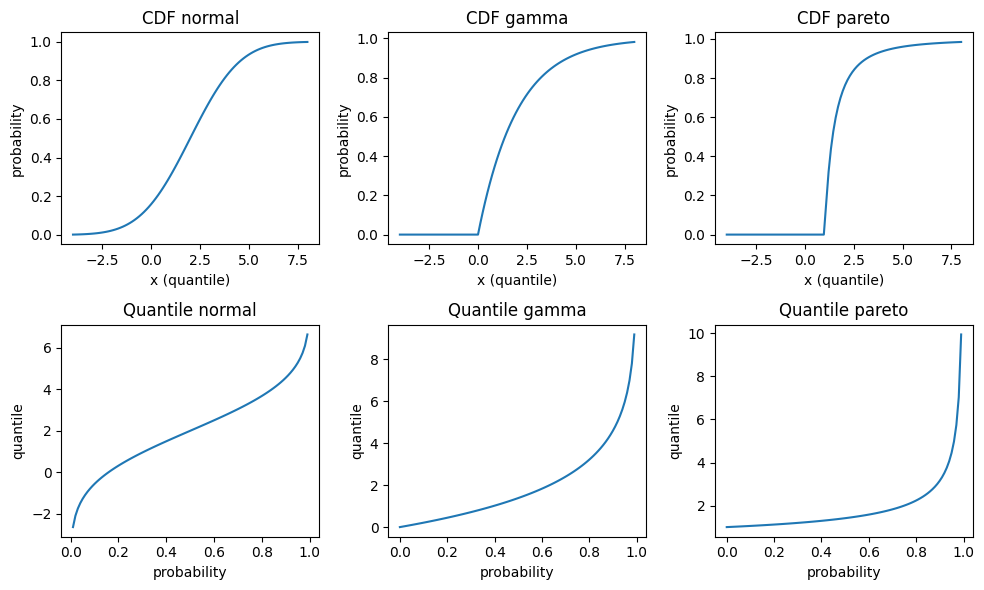

In [2]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6))

for i, (name, rv) in enumerate([
    ["normal", rv_norm],
    ["gamma", rv_gamma],
    ["pareto", rv_pareto]
]):
    print(f"{name=:<6} mean={rv.mean()} variance={rv.var()}")

    x = np.linspace(2 - 6, 2 + 6, num=100)
    axes[0, i].plot(x, rv.cdf(x))
    axes[0, i].set_xlabel("x (quantile)")
    axes[0, i].set_ylabel("probability")
    axes[0, i].set_title("CDF " + name)

    x = np.linspace(0, 1, num=100)
    axes[1, i].plot(x, rv.ppf(x))
    axes[1, i].set_xlabel("probability")
    axes[1, i].set_ylabel("quantile")
    axes[1, i].set_title("Quantile " + name)

fig.tight_layout()

## Empirical CDF

In [3]:
def plot_ecdf(x, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.sort(np.asarray(x))
    n = len(x)
    xmin = np.amin(x)
    xmax = np.amax(x)
    xstep = (xmax - xmin) / (n - 1)
    x_ext = np.r_[xmin - xstep, x]
    y = np.linspace(0, 1, num=n + 1)
    ax.hlines(y, x_ext, x_ext + xstep)
    ax.scatter(x, y[1:])
    ax.set_xlabel("x")
    ax.set_ylabel("probability")
    ax.set_title("Empirical CDF")
    return ax

def plot_equantile(x, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.sort(np.asarray(x))
    n = len(x)
    xmax = np.amax(x)
    x_ext = np.r_[x, xmax]
    y = np.linspace(0, 1, num=n + 1)
    ax.step(y, x_ext, where="post")
    ax.set_xlabel("probability")
    ax.set_ylabel("quantile")
    ax.set_title("Quantile of empricial CDF")
    return ax

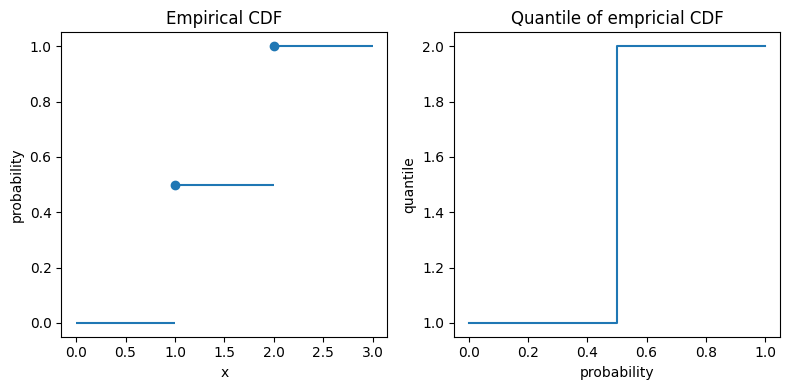

In [4]:
x = np.array([1, 2], dtype=float)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
plot_ecdf(x, ax=axes[0]);
plot_equantile(x, ax=axes[1]);
fig.tight_layout()

Text(0.5, 1.0, 'Expected scoring function for alpha=0.2')

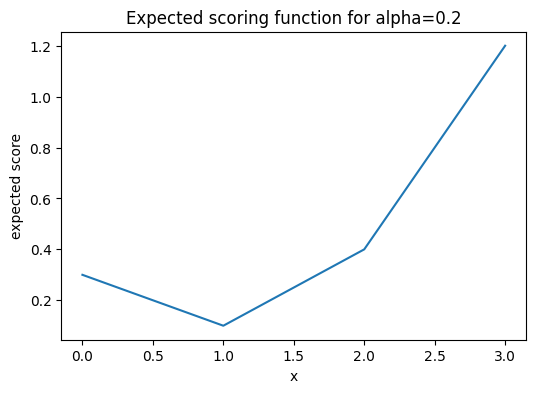

In [5]:
def S(x, y, alpha):
    return ((x > y) - alpha) * (x - y)

def ES(x, y, alpha):
    x = np.asarray(x)[:, None]
    y = np.asarray(y)[None, :]
    return np.mean(S(x, y, alpha=alpha), axis=1)  # mean over y

alpha = 0.2
x = np.linspace(0, 3, num=100)
y = ES(x, [1, 2], alpha=alpha)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_ylabel("expected score")
ax.set_title(f"Expected scoring function for {alpha=}")

## Empirical Quantiles

In [6]:
# HF = Hyndman & Fan (1996) Sample Quantiles in Statistical Packages
methods = [
    'inverted_cdf',               # HF-1
    'averaged_inverted_cdf',      # HF-2
    'closest_observation',        # HF-3
    'interpolated_inverted_cdf',  # HF-4
    'hazen',                      # HF-5
    'weibull',                    # HF-6
    'linear',                     # HF-7
    'median_unbiased',            # HF-8
    'normal_unbiased',            # HF-9
    'nearest',
    'lower',
    'higher',
    'midpoint',
]

In [7]:
alpha = 0.2
for m in methods:
    estimate = np.quantile([1, 2], 0.2, method=m)
    print(f"{m:<25} {alpha}-quantile estimate = {estimate}")

inverted_cdf              0.2-quantile estimate = 1
averaged_inverted_cdf     0.2-quantile estimate = 1.0
closest_observation       0.2-quantile estimate = 1
interpolated_inverted_cdf 0.2-quantile estimate = 1.0
hazen                     0.2-quantile estimate = 1.0
weibull                   0.2-quantile estimate = 1.0
linear                    0.2-quantile estimate = 1.2
median_unbiased           0.2-quantile estimate = 1.0
normal_unbiased           0.2-quantile estimate = 1.0
nearest                   0.2-quantile estimate = 1
lower                     0.2-quantile estimate = 1
higher                    0.2-quantile estimate = 2
midpoint                  0.2-quantile estimate = 1.5


In [8]:
x = rv_norm.rvs(size=(100_000, 10), random_state=42)

alpha = 0.15
print(f"{'Normal':<25} {alpha}-quantile (exact){'':<1} = {rv_norm.ppf(alpha)}")
for m in methods:
    estimate = np.quantile(x, alpha, axis=1, method=m).mean()
    print(f"{m:<25} {alpha}-quantile estimate = {estimate}")

Normal                    0.15-quantile (exact)  = -0.07286677898757965
inverted_cdf              0.15-quantile estimate = -0.006610098845151237
averaged_inverted_cdf     0.15-quantile estimate = -0.006610098845151237
closest_observation       0.15-quantile estimate = -1.0803721733927345
interpolated_inverted_cdf 0.15-quantile estimate = -0.5434911361189428
hazen                     0.15-quantile estimate = -0.006610098845151237
weibull                   0.15-quantile estimate = -0.3824268249368055
linear                    0.15-quantile estimate = 0.23581458217659249
median_unbiased           0.15-quantile estimate = -0.13188234087570264
normal_unbiased           0.15-quantile estimate = -0.10056428036806467
nearest                   0.15-quantile estimate = -0.006610098845151237
lower                     0.15-quantile estimate = -0.006610098845151237
higher                    0.15-quantile estimate = 0.6860318469312597
midpoint                  0.15-quantile estimate = 0.339710874043

In [9]:
def quantile_estimates(rv, n_samples=10_000, n_size=10, alpha=0.5, random_state=None):
    x = rv.rvs(size=(n_samples, n_size), random_state=random_state)
    df = pl.DataFrame({
        "distribution": rv.dist.name,
        "method": "theoretical quantile",
        "level": alpha,
        "value": rv.ppf(alpha),
        "min": rv.ppf(alpha),
        "max": rv.ppf(alpha),
    })
    for m in methods:
        estimate = np.quantile(x, 0.1, axis=1, method=m).mean()
        q = np.quantile(x, alpha, axis=1, method=m)
        df = df.vstack(pl.DataFrame({
            "distribution": rv.dist.name,
            "method": m,
            "level": alpha, 
            "value": np.mean(q),
            "min": np.quantile(q, 0.05),  #np.amin(q),
            "max": np.quantile(q, 0.95),  #np.amax(q),
        }))
    df = df.with_columns([
        (
            pl.col("value") - df.filter(pl.col("method") == "theoretical quantile").select(pl.col("value"))
        ).alias("diff")
    ])
    return df

In [10]:
quantile_estimates(rv_norm, n_samples=10_000, n_size=10, alpha=0.15, random_state=4321)

distribution,method,level,value,min,max,diff
str,str,f64,f64,f64,f64,f64
"""norm""","""theoretical qu...",0.15,-0.072867,-0.072867,-0.072867,0.0
"""norm""","""inverted_cdf""",0.15,0.007798,-1.575917,1.483612,0.080665
"""norm""","""averaged_inver...",0.15,0.007798,-1.575917,1.483612,0.080665
"""norm""","""closest_observ...",0.15,-1.06574,-3.100902,0.7213,-0.992874
"""norm""","""interpolated_i...",0.15,-0.528971,-2.141408,0.974026,-0.456104
"""norm""","""hazen""",0.15,0.007798,-1.575917,1.483612,0.080665
"""norm""","""weibull""",0.15,-0.36794,-1.930742,1.062992,-0.295073
"""norm""","""linear""",0.15,0.250942,-1.172901,1.608284,0.323808
"""norm""","""median_unbiase...",0.15,-0.117448,-1.682091,1.318208,-0.044581


In [11]:
rng = np.random.default_rng(11235813)
dfs = []
for rv in (rv_norm, rv_gamma,rv_pareto):
    for alpha in [0.15, 0.5, 0.85]:
        df = quantile_estimates(rv, n_samples=10_000, n_size=10, alpha=alpha, random_state=rng)
        dfs.append(df)
df = pl.concat(dfs)

In [12]:
pl.Config.set_tbl_rows(18)
df

distribution,method,level,value,min,max,diff
str,str,f64,f64,f64,f64,f64
"""norm""","""theoretical qu...",0.15,-0.072867,-0.072867,-0.072867,0.0
"""norm""","""inverted_cdf""",0.15,-0.03113,-1.638152,1.422278,0.041737
"""norm""","""averaged_inver...",0.15,-0.03113,-1.638152,1.422278,0.041737
"""norm""","""closest_observ...",0.15,-1.092779,-3.182106,0.667585,-1.019912
"""norm""","""interpolated_i...",0.15,-0.561954,-2.19929,0.926217,-0.489088
"""norm""","""hazen""",0.15,-0.03113,-1.638152,1.422278,0.041737
"""norm""","""weibull""",0.15,-0.402707,-1.99435,1.04909,-0.32984
"""norm""","""linear""",0.15,0.214718,-1.237025,1.560648,0.287585
"""norm""","""median_unbiase...",0.15,-0.154989,-1.739227,1.270084,-0.082122


/var/folders/1c/ynyjslg54654183kt57yfsdw0000gn/T/ipykernel_59935/1665088798.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 0.98, 'Sample Quantiles')

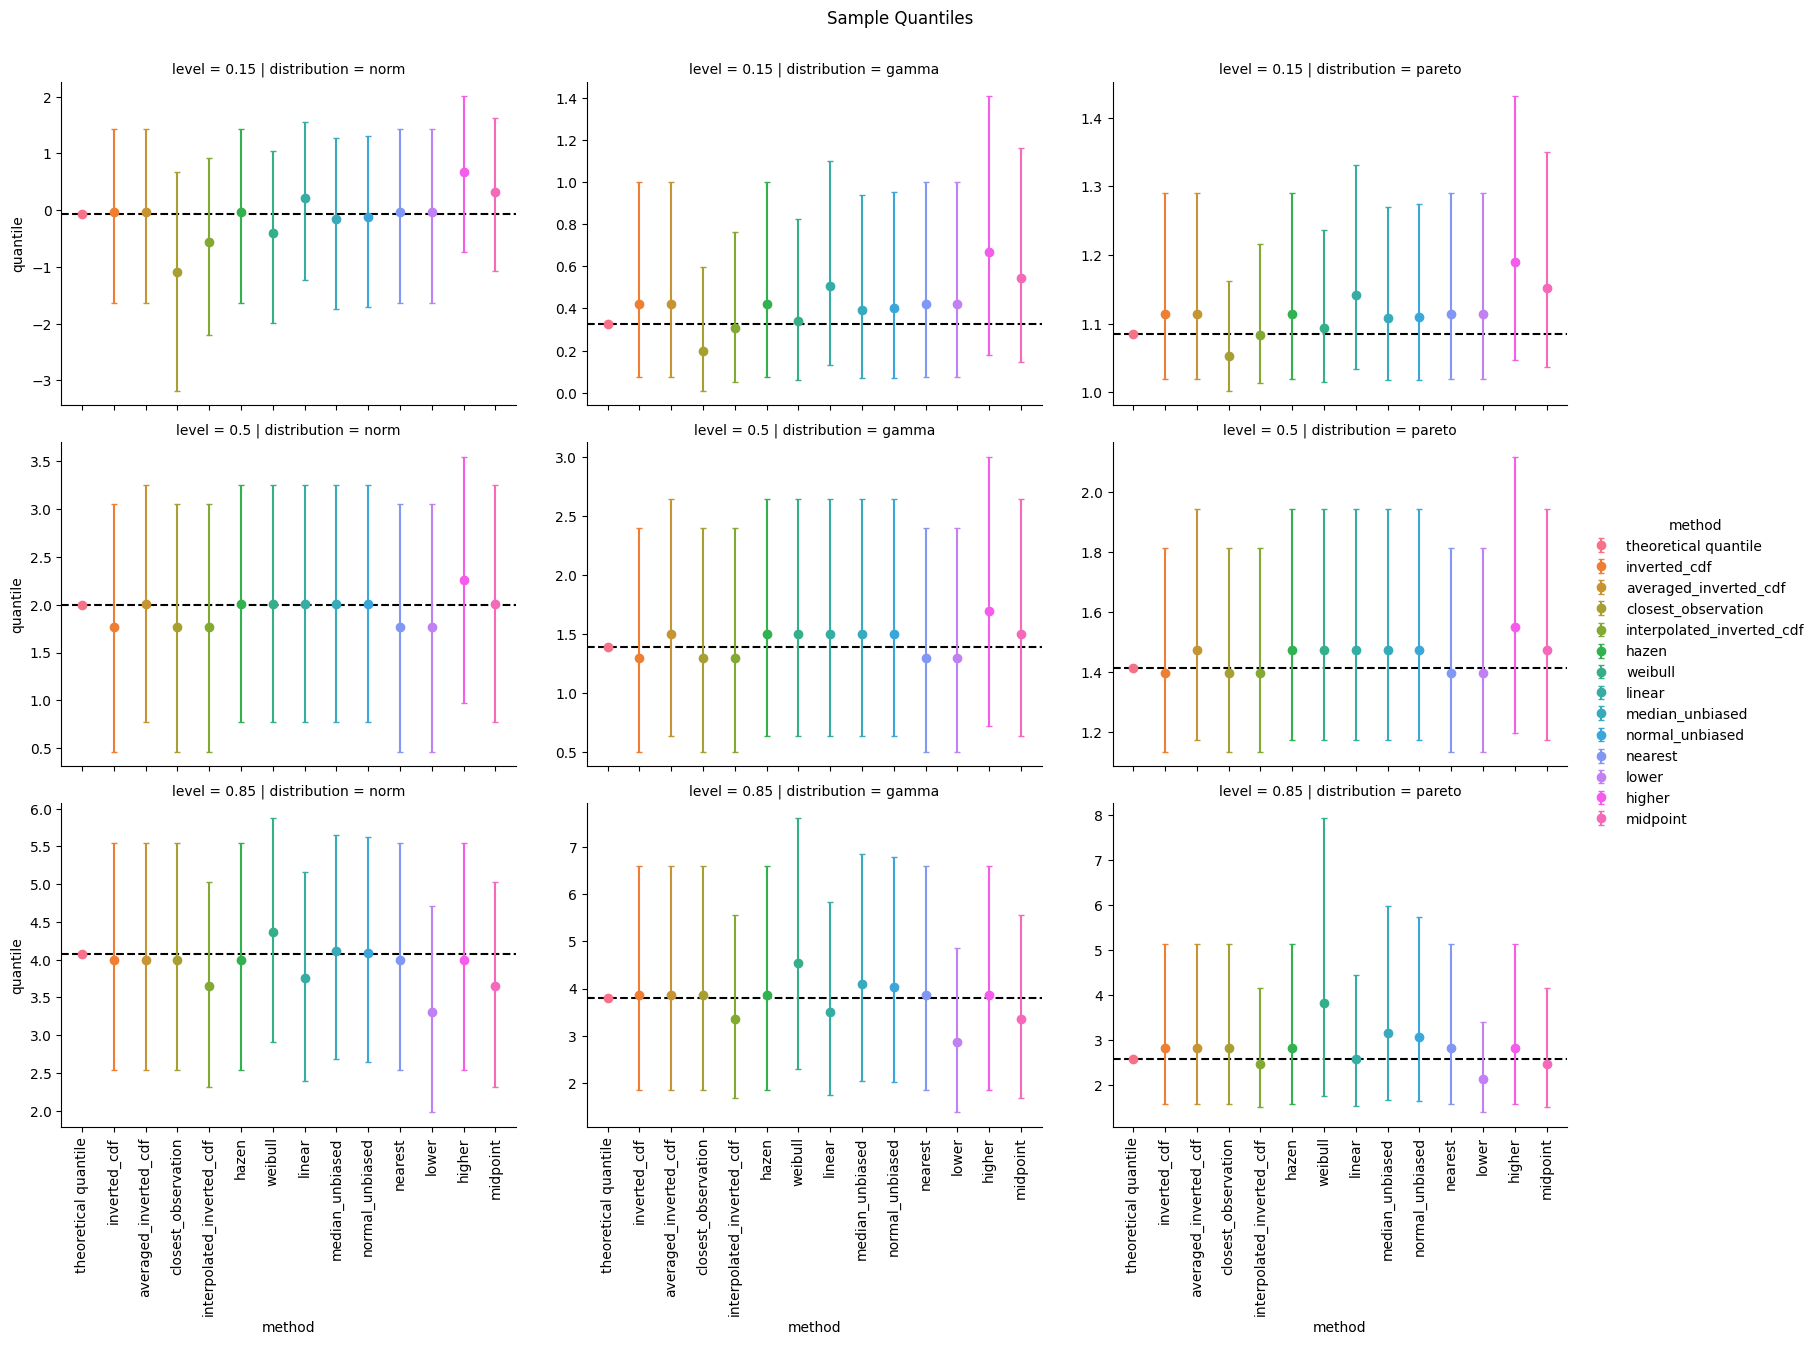

In [13]:
def errplot(x, y, ymin, ymax, refline, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    ax.errorbar(
        x=data[x],
        y=data[y],
        yerr=np.c_[data[y] - data[ymin], data[ymax] - data[y]].T,
        **kwargs,
    )
    if refline is not None:
        y_ref = data.loc[data["method"]=="theoretical quantile", "value"].min()
        ax.axhline(y=y_ref, linestyle="--", color="k")
        pass

g = sns.FacetGrid(
    df.to_pandas(),
    col="distribution",
    row="level",
    hue="method",
    height=4,
    aspect=4/3,
    sharey=False,
)
g.map_dataframe(
    errplot,
    x="method",
    y="value",
    ymin="min",
    ymax="max",
    refline="theoretical quantile",
    marker="o",
    linestyle="",
    capsize=2,
)

#for ax in g.axes.flat:
for ax in g.axes[-1, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.set_axis_labels(y_var="quantile")
g.add_legend()
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Sample Quantiles", fontsize=12)

In [14]:
# g.savefig("quantile_simulation.png", dpi=300)

## Quantile Regression

In [15]:
df = sns.load_dataset("penguins").dropna()

In [16]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [17]:
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import QuantileRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, SplineTransformer

In [18]:
y = df["body_mass_g"]
X = df.drop(columns="body_mass_g")
qr50 = Pipeline([
    ("column_transformer",
     ColumnTransformer([
         ("ohe", OneHotEncoder(drop="first"), ["species", "island", "sex"]),
         ("spline", SplineTransformer(n_knots=3, degree=2), ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]),
         
     ])
    ),
    ("quantile_regressor",
     QuantileRegressor(quantile=0.5, alpha=0, solver="highs")
    )
])
qr15 = clone(qr50)
qr15.set_params(quantile_regressor__quantile=0.15)
qr85 = clone(qr50)
qr85.set_params(quantile_regressor__quantile=0.85)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['species', 'island', 'sex']),
                                                 ('spline',
                                                  SplineTransformer(degree=2,
                                                                    n_knots=3),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('quantile_regressor',
                 QuantileRegressor(alpha=0, quantile=0.85, solver='highs'))])

In [19]:
qr15.fit(X, y)
qr50.fit(X, y)
qr85.fit(X, y)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['species', 'island', 'sex']),
                                                 ('spline',
                                                  SplineTransformer(degree=2,
                                                                    n_knots=3),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('quantile_regressor',
                 QuantileRegressor(alpha=0, quantile=0.85, solver='highs'))])

In [20]:
df_obs = df.copy()
df_obs["type"] = "observed"
dfs = [pl.from_pandas(df_obs)]
for m, name in [(qr15, "15%-q"), (qr50, "median"), (qr85, "85%-q")]:
    df_pred = df.copy()
    df_pred["type"] = "predicted_" + name
    df_pred["body_mass_g"] = m.predict(X)
    dfs.append(pl.from_pandas(df_pred))
df_pred = pl.concat(dfs).to_pandas()

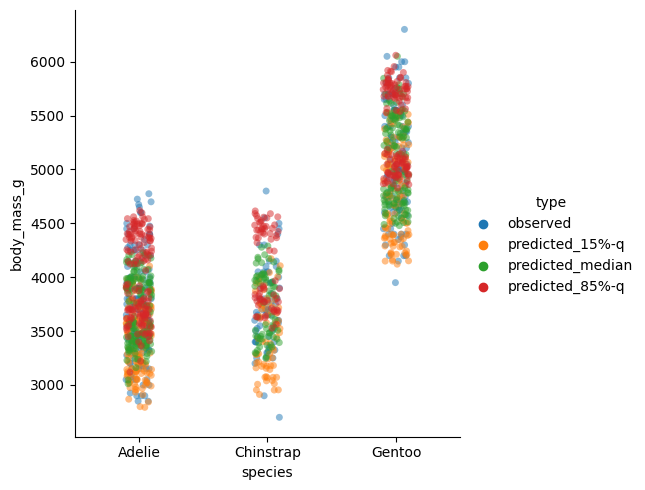

In [21]:
sns.catplot(df_pred, x="species", y="body_mass_g", hue="type", alpha=0.5)

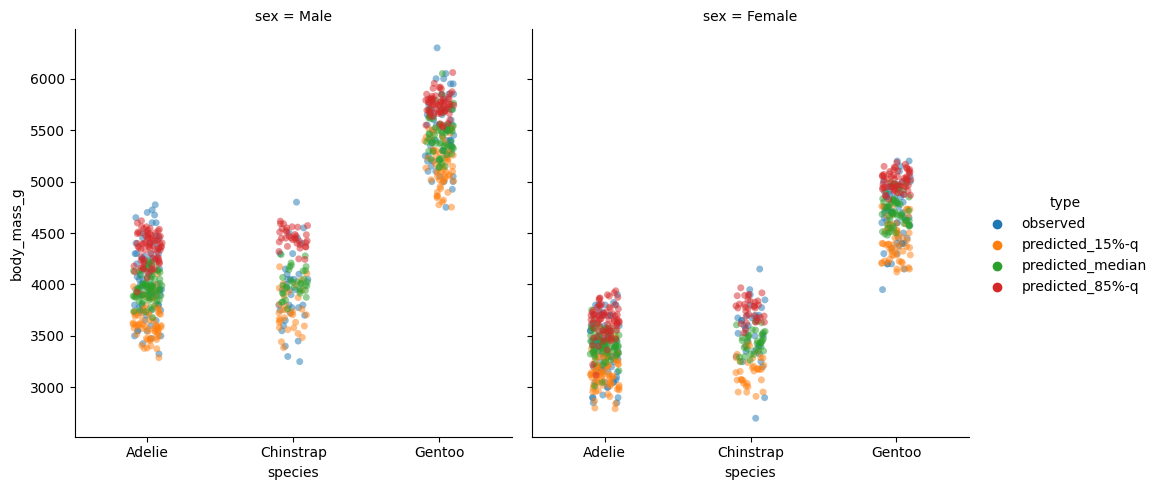

In [22]:
sns.catplot(df_pred, x="species", y="body_mass_g", hue="type", col="sex", alpha=0.5)

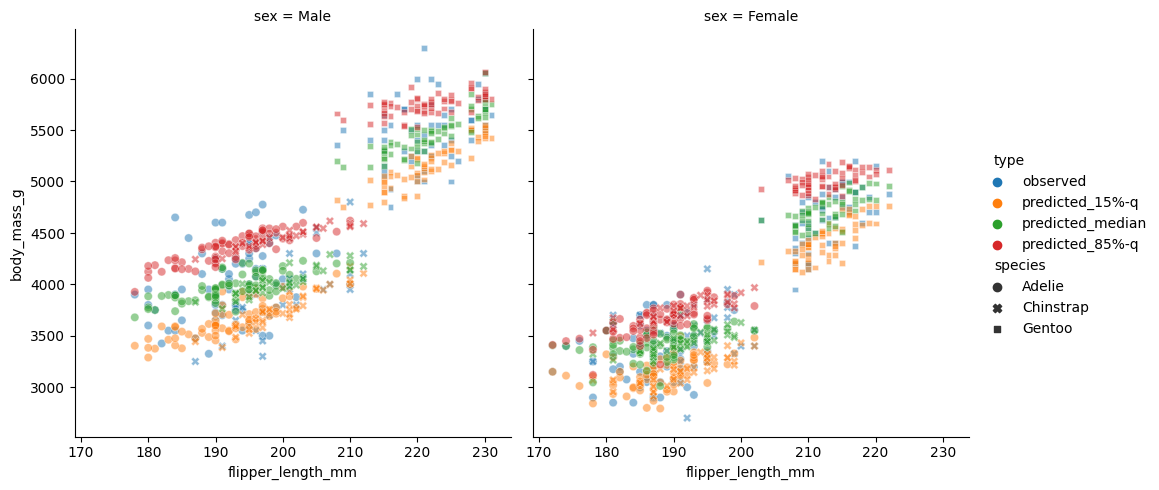

In [23]:
sns.relplot(
    df_pred,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="type",
    col="sex",
    style="species",
    alpha=0.5,
)

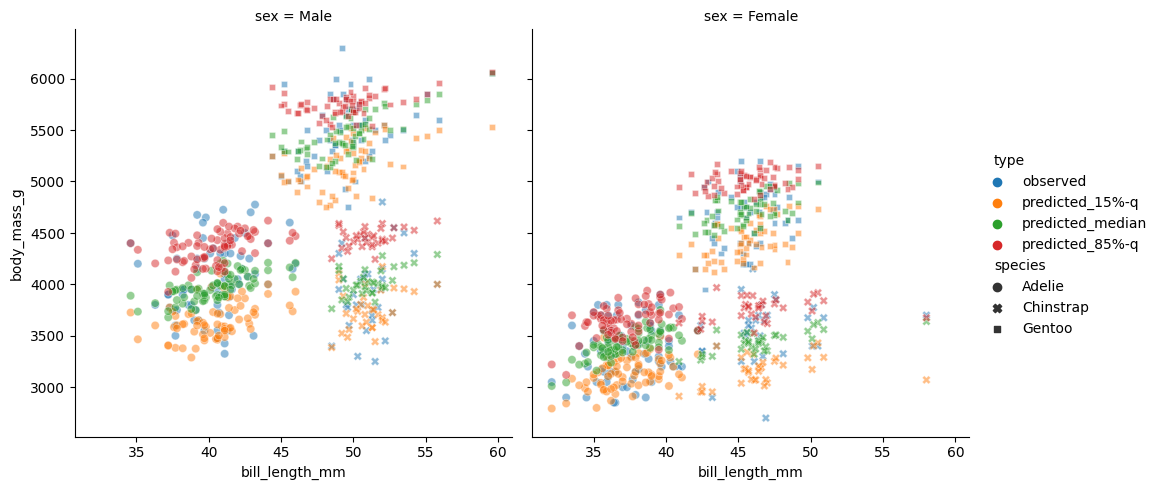

In [24]:
sns.relplot(
    df_pred,
    x="bill_length_mm",
    y="body_mass_g",
    hue="type",
    col="sex",
    style="species",
    alpha=0.5,
)

In [25]:
[
    np.mean(y <= qr15.predict(X)),
    np.mean(y <= qr50.predict(X)),
    np.mean(y <= qr85.predict(X)),
]

[0.15015015015015015, 0.5225225225225225, 0.8618618618618619]